In [3]:
import pandas as pd
import numpy as np
from keplergl import KeplerGl
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\Admin\Desktopworkfolder\term 2\Machine learning\CA1\kc_house_data\kc_house_data.csv') #  desktop
# df = pd.read_csv(r'C:\Users\alvin\Deskstopworkfolder\term 2\Machine learning\CA1\kc_house_data\kc_house_data.csv')

# https://www.youtube.com/watch?v=H8kocPOT5v0
# https://www.youtube.com/watch?v=H8kocPOT5v0&ab_channel=NeuralNine

# https://www.kaggle.com/code/yasintrk/linear-and-polynimal-regression 
# https://www.kaggle.com/code/caesarmario/house-price-w-linear-ridge-regression - this has a table to compare different models
# https://www.kaggle.com/code/divan0/multiple-linear-regression
# https://github.com/aidanandrucyk/KingCountyHouseSalePriceMLAnalysis/blob/master/ML_King_County_Housing_Price_Predictor.ipynb
# https://github.com/threnjen/king_county_housing?tab=readme-ov-file
# https://github.com/nadinezab/kc-house-prices-prediction/blob/master/kc-house-prices.ipynb

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
map_1 = KeplerGl(height=900)
map_1.add_data(data=df, name="King County")
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'King County': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…

In [9]:
# the map shows that there are some houses are found far away from the inner city areas. 

3123089010
3123089027
9413400165
4032500035
192300020

226109056
7349800780

774100475
774101755
774100355

2626119028
2626119062
5061300030
7805600070
5062300280

8649400790
8649400410
8649401000
8649401270
1437500015
1437500035

1437500035

In [10]:
# total of 21 houses are not within the inner cities, and I remove them from the dataset

In [11]:
# df.columns = df.columns.str.strip()

In [12]:
ids_to_remove = [
    '3123089010', '3123089027', '9413400165', 
    '4032500035','192300020','226109056', 
    '7349800780', '774100475', '774101755', 
    '774100355', '2626119028', '2626119062', 
    '5061300030', '7805600070', '5062300280',
    '8649400790', '8649400410', '8649401000', 
    '8649401270','1437500015', '1437500035']

df['id'] = df['id'].astype(str)
df_filtered = df[~df['id'].isin(ids_to_remove)]

In [13]:
print("Original size:", len(df))
print("Filtered size:", len(df_filtered))
print("Rows removed:", len(df) - len(df_filtered))

Original size: 21613
Filtered size: 21592
Rows removed: 21


In [14]:
df_filtered.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
df_filtered['date'] = df_filtered['date'].str.replace('T000000', '', regex=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_35372\3997594376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].str.replace('T000000', '', regex=False)


In [16]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y%m%d')

C:\Users\Admin\AppData\Local\Temp\ipykernel_35372\1455118406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y%m%d')


In [17]:
df_filtered

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [18]:
df_filtered.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

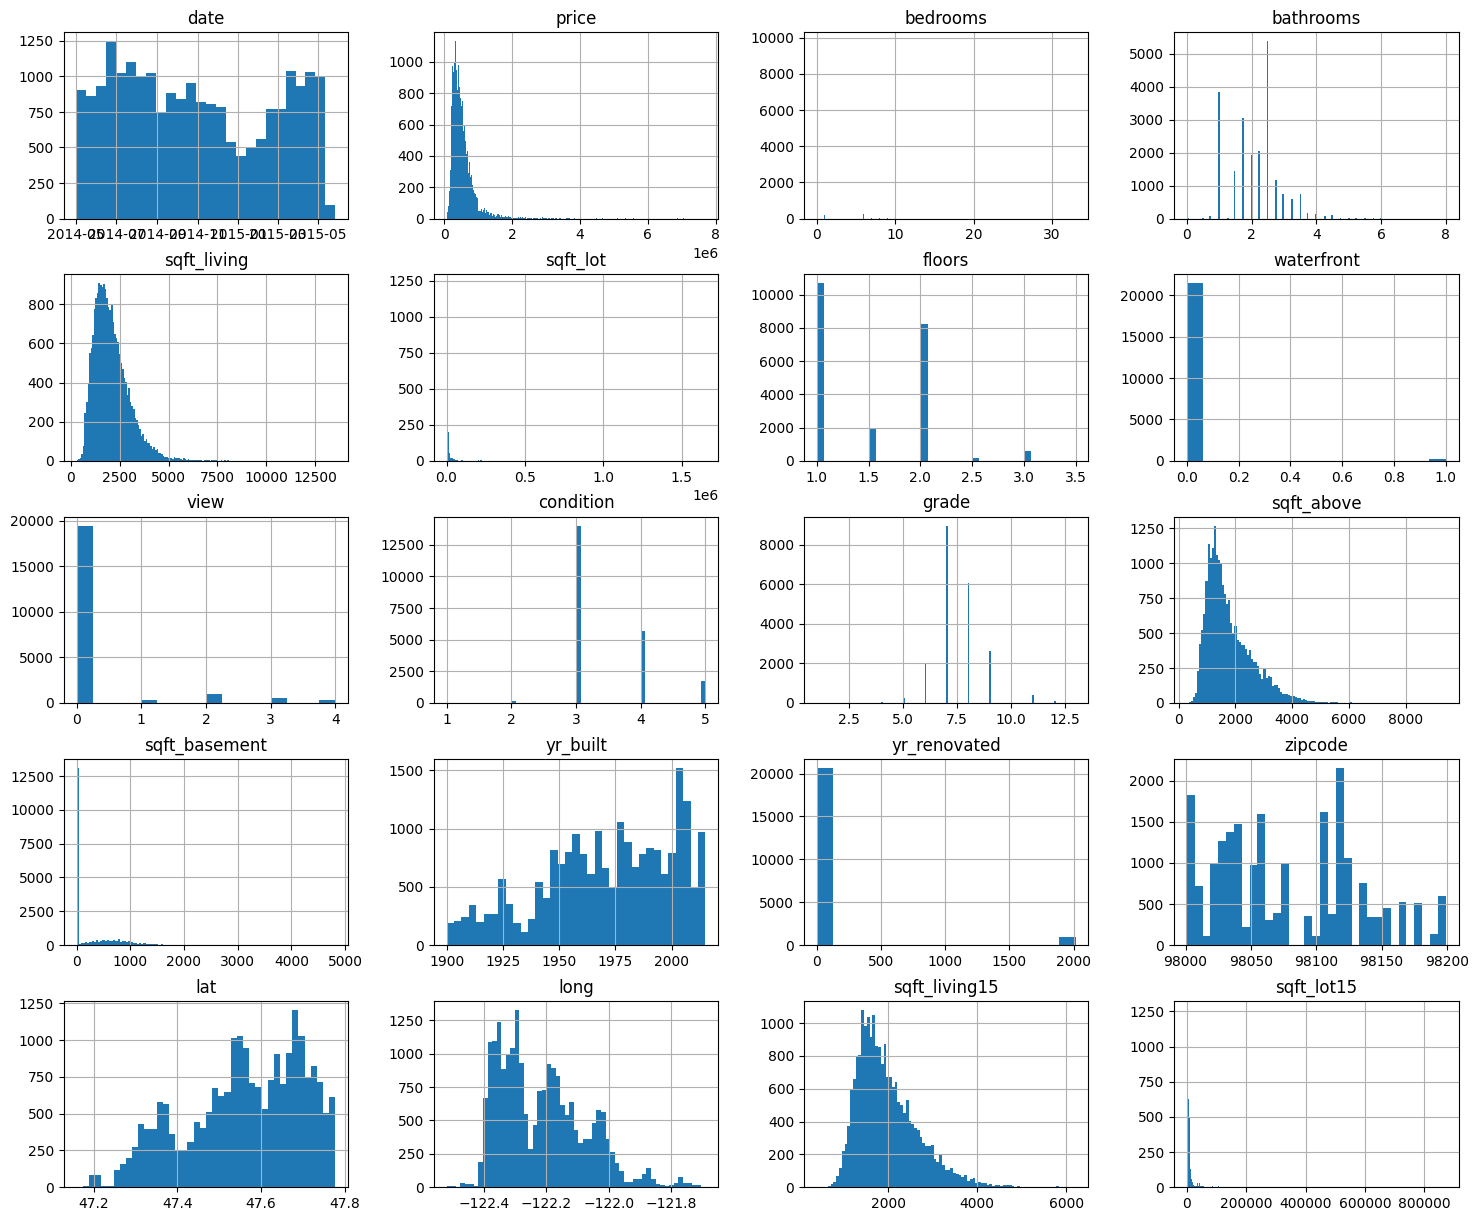

In [19]:
df_filtered.hist(figsize=(18,15), bins='auto')

In [20]:
df_filtered_trans = df_filtered.copy()

In [21]:
# Whether there was renovation done 
df_filtered_trans['renovation_status'] = (df_filtered_trans['yr_renovated'] != 0).astype(int)

# Size of the basement, if basement = 0 can assume that basement doesnt exist
df_filtered_trans['basement_presence'] = (df_filtered_trans['sqft_basement'] != 0).astype(int)

In [22]:
df_filtered_trans.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovation_status',
       'basement_presence'],
      dtype='object')

In [23]:
df_filtered_trans[['basement_presence', 'sqft_basement']]

,basement_presence,sqft_basement
0,0,0
1,1,400
2,0,0
3,1,910
4,0,0
...,...,...
21608,0,0
21609,0,0
21610,0,0
21611,0,0


In [24]:
df_corr = df_filtered_trans.drop(['id', 'lat', 'long', 'date','zipcode'], axis = 1)

In [25]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21592 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21592 non-null  float64
 1   bedrooms           21592 non-null  int64  
 2   bathrooms          21592 non-null  float64
 3   sqft_living        21592 non-null  int64  
 4   sqft_lot           21592 non-null  int64  
 5   floors             21592 non-null  float64
 6   waterfront         21592 non-null  int64  
 7   view               21592 non-null  int64  
 8   condition          21592 non-null  int64  
 9   grade              21592 non-null  int64  
 10  sqft_above         21592 non-null  int64  
 11  sqft_basement      21592 non-null  int64  
 12  yr_built           21592 non-null  int64  
 13  yr_renovated       21592 non-null  int64  
 14  sqft_living15      21592 non-null  int64  
 15  sqft_lot15         21592 non-null  int64  
 16  renovation_status  21592 no

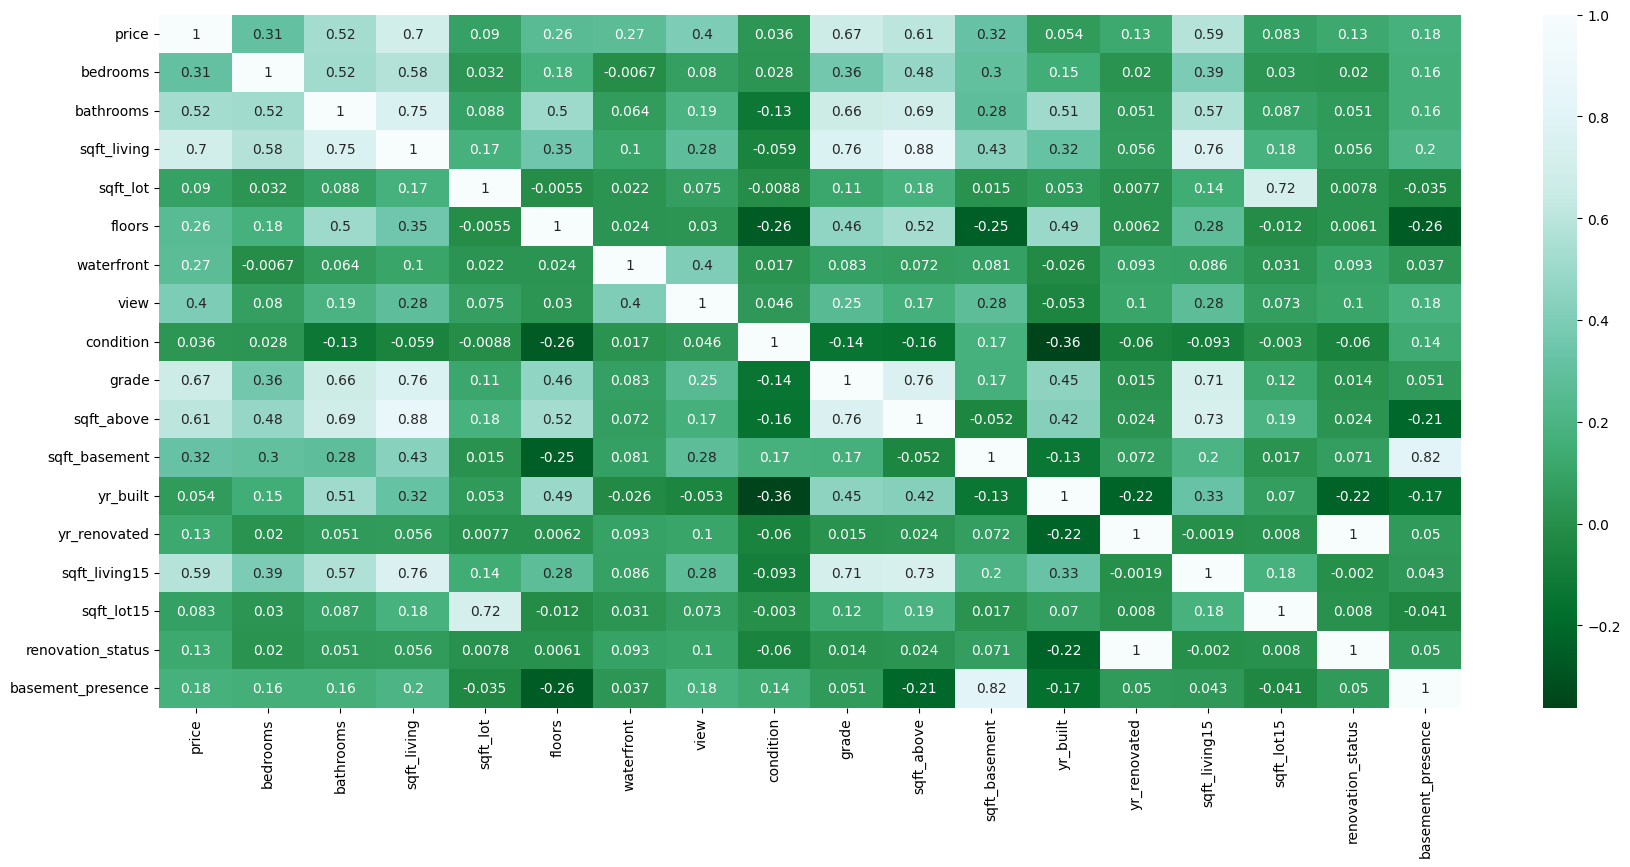

In [26]:
plt.figure(figsize=(21, 9)) 
sns.heatmap(df_corr.corr(), annot=True, cmap='BuGn_r') 
plt.show()

In [27]:
# Correlation of all features with 'price'
corr_with_price = df_corr.corr()['price'].sort_values(ascending=False)

# Top positive correlations (excluding price itself)
top_positive = corr_with_price[1:6]  # top 5
print("Top Positive Correlations with Price:\n", top_positive)

# Top negative correlations
top_negative = corr_with_price.tail(5)  # bottom 5
print("\nTop Negative Correlations with Price:\n", top_negative)

Top Positive Correlations with Price:
 sqft_living      0.701964
grade            0.667395
sqft_above       0.605513
sqft_living15    0.585074
bathrooms        0.524872
Name: price, dtype: float64

Top Negative Correlations with Price:
 renovation_status    0.126824
sqft_lot             0.089837
sqft_lot15           0.082709
yr_built             0.053886
condition            0.036287
Name: price, dtype: float64


<Axes: xlabel='long', ylabel='lat'>

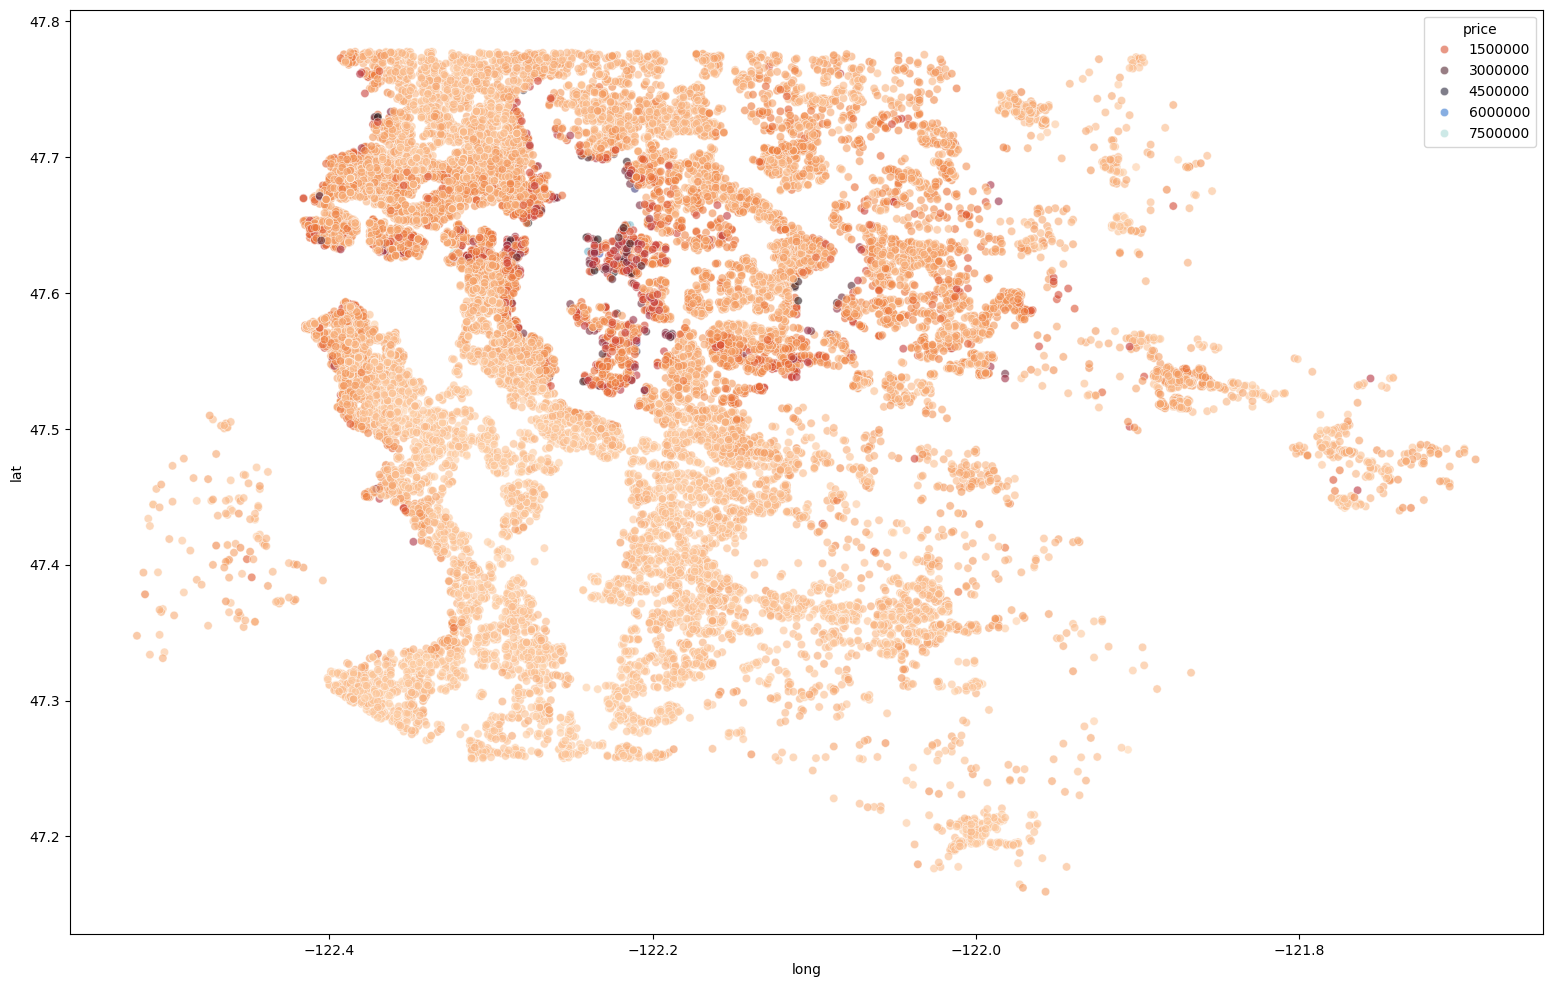

In [28]:
plt.figure(figsize=(19,12))
sns.scatterplot(x='long', y='lat', data=df_filtered_trans, hue ='price', alpha=.6, palette='icefire_r')

## An image of King County for comparsion - It appears that waterfront command higher prices
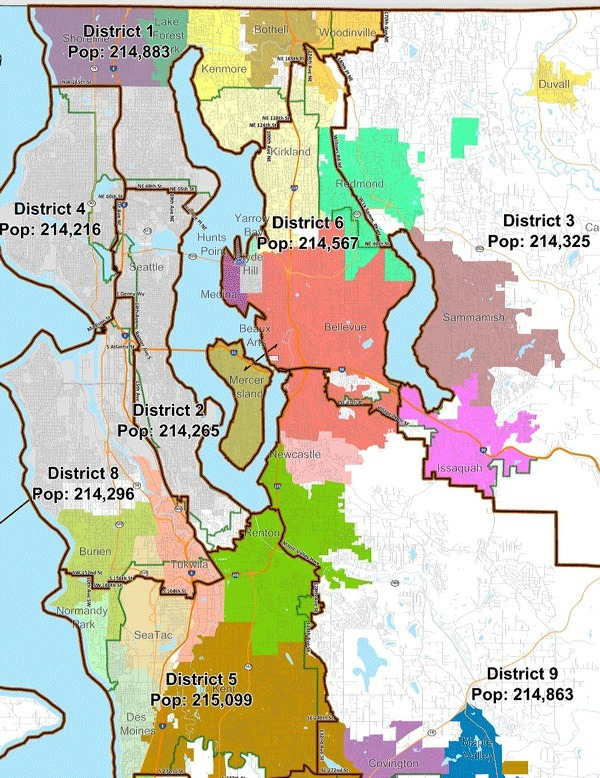

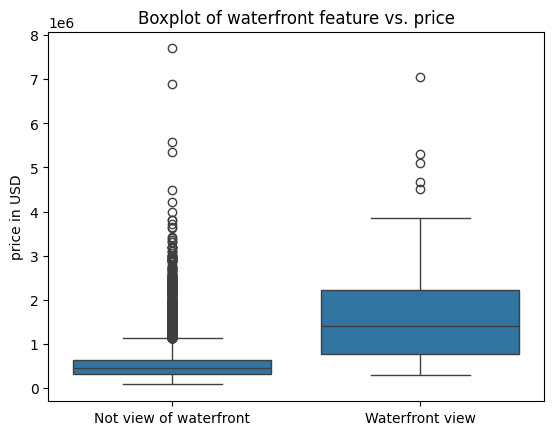

In [30]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df_filtered_trans['waterfront'], y = df_filtered['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [31]:
waterfrontmean = df_filtered_trans[df_filtered_trans['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = df_filtered_trans[df_filtered_trans['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

The mean house price for a house with waterfront view is USD 1661876.02
The mean house price for a house without waterfront view is USD 531821.28


In [32]:
zipunique_actual = df_filtered_trans['zipcode'].nunique()
print(df_filtered_trans['zipcode'].unique())
print(f"The total number of unique zipcodes is {zipunique_actual}")

[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]
The total number of unique zipcodes is 70


In [33]:
zip_to_district = {
    # District 1 (N Seattle, Shoreline, Lake Forest Park)
    98103: 1, 98115: 1, 98125: 1, 98133: 1, 98155: 1, 98177: 1, 98105: 1, 98117: 1, 98107: 1, 
    # District 2 (Redmond, Sammamish, Carnation)
    98028: 2, 98052: 2, 98053: 2, 98074: 2, 98075: 2, 98077: 2,  98118: 2,
    # District 3 (Bellevue, Kirkland, Mercer Island)
    98004: 3, 98005: 3, 98006: 3, 98007: 3, 98008: 3, 98033: 3, 98034: 3, 98039: 3, 98011: 3, 
    # District 4 (Downtown Seattle, Queen Anne, Capitol Hill)
    98101: 4, 98102: 4, 98104: 4, 98109: 4, 98112: 4, 98121: 4, 98122: 4, 98144: 4, 98119: 4,  
    # District 5 (Kent, Renton, Tukwila)
    98030: 5, 98031: 5, 98032: 5, 98042: 5, 98058: 5, 98059: 5, 98178: 5, 98188: 5, 98055: 5, 98108: 5,  98166: 5,
    # District 6 (Auburn, Federal Way)
    98001: 6, 98002: 6, 98023: 6, 98063: 6, 98092: 6, 98198: 6, 98003: 6,  
    # District 7 (Issaquah, Snoqualmie, North Bend)
    98024: 7, 98027: 7, 98029: 7, 98045: 7, 98065: 7, 98072: 7,  98199: 7,
    # District 8 (Vashon Island, Burien, White Center)
    98010: 8, 98022: 8, 98040: 8, 98056: 8, 98057: 8, 98116: 8, 98136: 8, 98146: 8, 98106: 8, 98168: 8,  
    # District 9 (Rural: Enumclaw, Skykomish, Maple Valley)
    98019: 9, 98038: 9, 98051: 9, 98068: 9, 98070: 9, 98083: 9, 98288: 9, 98126: 9, 98148: 9,  98014: 9,   
}

In [34]:
df_filtered_trans['zipcodemapping'] = df_filtered_trans['zipcode'].map(zip_to_district)

In [35]:
# Count number of nulls
df_filtered_trans['zipcodemapping'].isnull().sum()

# Filter rows with null values
df_filtered_trans[df_filtered_trans['zipcodemapping'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_status,basement_presence,zipcodemapping


In [36]:
df_filtered_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21592 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21592 non-null  object        
 1   date               21592 non-null  datetime64[ns]
 2   price              21592 non-null  float64       
 3   bedrooms           21592 non-null  int64         
 4   bathrooms          21592 non-null  float64       
 5   sqft_living        21592 non-null  int64         
 6   sqft_lot           21592 non-null  int64         
 7   floors             21592 non-null  float64       
 8   waterfront         21592 non-null  int64         
 9   view               21592 non-null  int64         
 10  condition          21592 non-null  int64         
 11  grade              21592 non-null  int64         
 12  sqft_above         21592 non-null  int64         
 13  sqft_basement      21592 non-null  int64         
 14  yr_built   

In [37]:
from math import radians, cos, sin, asin, sqrt

# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    return R * c

# Load your dataset

# Define Seattle downtown coordinates
seattle_lat, seattle_long = 47.6062, -122.3321

# Calculate distance
df_filtered_trans['distance_to_seattle_km'] = df_filtered_trans.apply(
    lambda row: haversine(row['lat'], row['long'], seattle_lat, seattle_long),
    axis=1
)

In [38]:
df_filtered_trans

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_status,basement_presence,zipcodemapping,distance_to_seattle_km
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,0,0,5,11.972687
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,1,1,1,12.802819
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,0,0,2,16.416960
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,0,1,8,10.538233
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,0,0,2,21.553979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,0,0,1,10.404472
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,0,0,8,10.853552
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,0,0,4,2.807293
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,0,0,7,21.287500


In [39]:
distance_max_sea = df_filtered_trans["distance_to_seattle_km"].max()
distance_min_sea = df_filtered_trans['distance_to_seattle_km'].min()

print(r"the max distance", distance_max_sea)
print(r"the min distance", distance_min_sea)

the max distance 57.15716468894553
the min distance 0.9831189532453394


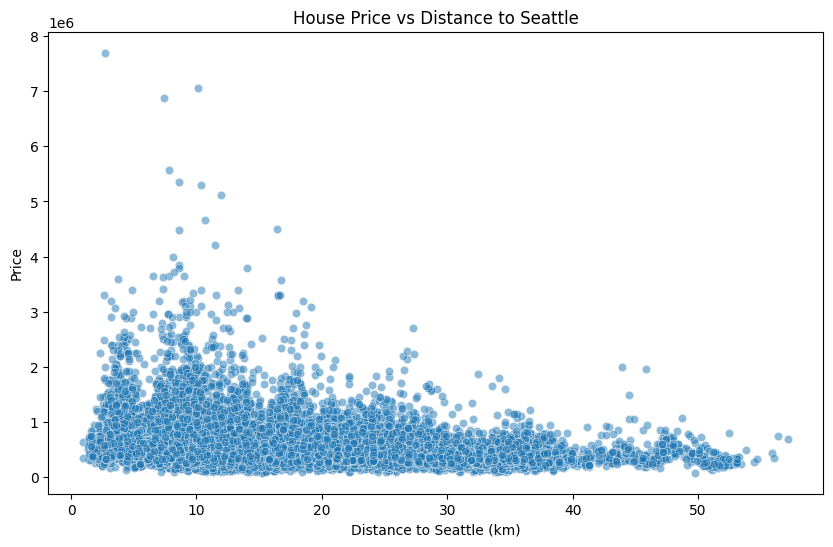

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered_trans, x='distance_to_seattle_km', y='price', alpha=0.5)
plt.title("House Price vs Distance to Seattle")
plt.xlabel("Distance to Seattle (km)")
plt.ylabel("Price")
plt.show()

In [41]:
print(df_filtered_trans[['distance_to_seattle_km', 'price']].corr())

                        distance_to_seattle_km     price
distance_to_seattle_km                1.000000 -0.286856
price                                -0.286856  1.000000


In [42]:
df_filtered_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21592 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      21592 non-null  object        
 1   date                    21592 non-null  datetime64[ns]
 2   price                   21592 non-null  float64       
 3   bedrooms                21592 non-null  int64         
 4   bathrooms               21592 non-null  float64       
 5   sqft_living             21592 non-null  int64         
 6   sqft_lot                21592 non-null  int64         
 7   floors                  21592 non-null  float64       
 8   waterfront              21592 non-null  int64         
 9   view                    21592 non-null  int64         
 10  condition               21592 non-null  int64         
 11  grade                   21592 non-null  int64         
 12  sqft_above              21592 non-null  int64      

In [43]:
def map_season(date):
    month = date.month
    
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

df_filtered_trans['season'] = df_filtered_trans['date'].apply(map_season)

In [44]:
df_filtered_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21592 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      21592 non-null  object        
 1   date                    21592 non-null  datetime64[ns]
 2   price                   21592 non-null  float64       
 3   bedrooms                21592 non-null  int64         
 4   bathrooms               21592 non-null  float64       
 5   sqft_living             21592 non-null  int64         
 6   sqft_lot                21592 non-null  int64         
 7   floors                  21592 non-null  float64       
 8   waterfront              21592 non-null  int64         
 9   view                    21592 non-null  int64         
 10  condition               21592 non-null  int64         
 11  grade                   21592 non-null  int64         
 12  sqft_above              21592 non-null  int64      

In [45]:
df_filtered_trans

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_status,basement_presence,zipcodemapping,distance_to_seattle_km,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,0,0,5,11.972687,Fall
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,1,1,1,12.802819,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,0,0,2,16.416960,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,0,1,8,10.538233,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,0,0,2,21.553979,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,98103,47.6993,-122.346,1530,1509,0,0,1,10.404472,Spring
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,0,0,8,10.853552,Winter
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,0,0,4,2.807293,Summer
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,0,0,7,21.287500,Winter


In [46]:
df_filtered_trans = pd.get_dummies(df_filtered_trans, columns=['season'], dtype=int)
df_filtered_trans = pd.get_dummies(df_filtered_trans, columns=['zipcodemapping'], dtype=int)

In [47]:
df_filtered_trans

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,season_Winter,zipcodemapping_1,zipcodemapping_2,zipcodemapping_3,zipcodemapping_4,zipcodemapping_5,zipcodemapping_6,zipcodemapping_7,zipcodemapping_8,zipcodemapping_9
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,1,0,0,0,0,0,0,0,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,0,1,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [48]:
df_final = df_filtered_trans.drop(['id', 'lat', 'long', 'date','zipcode'], axis = 1)

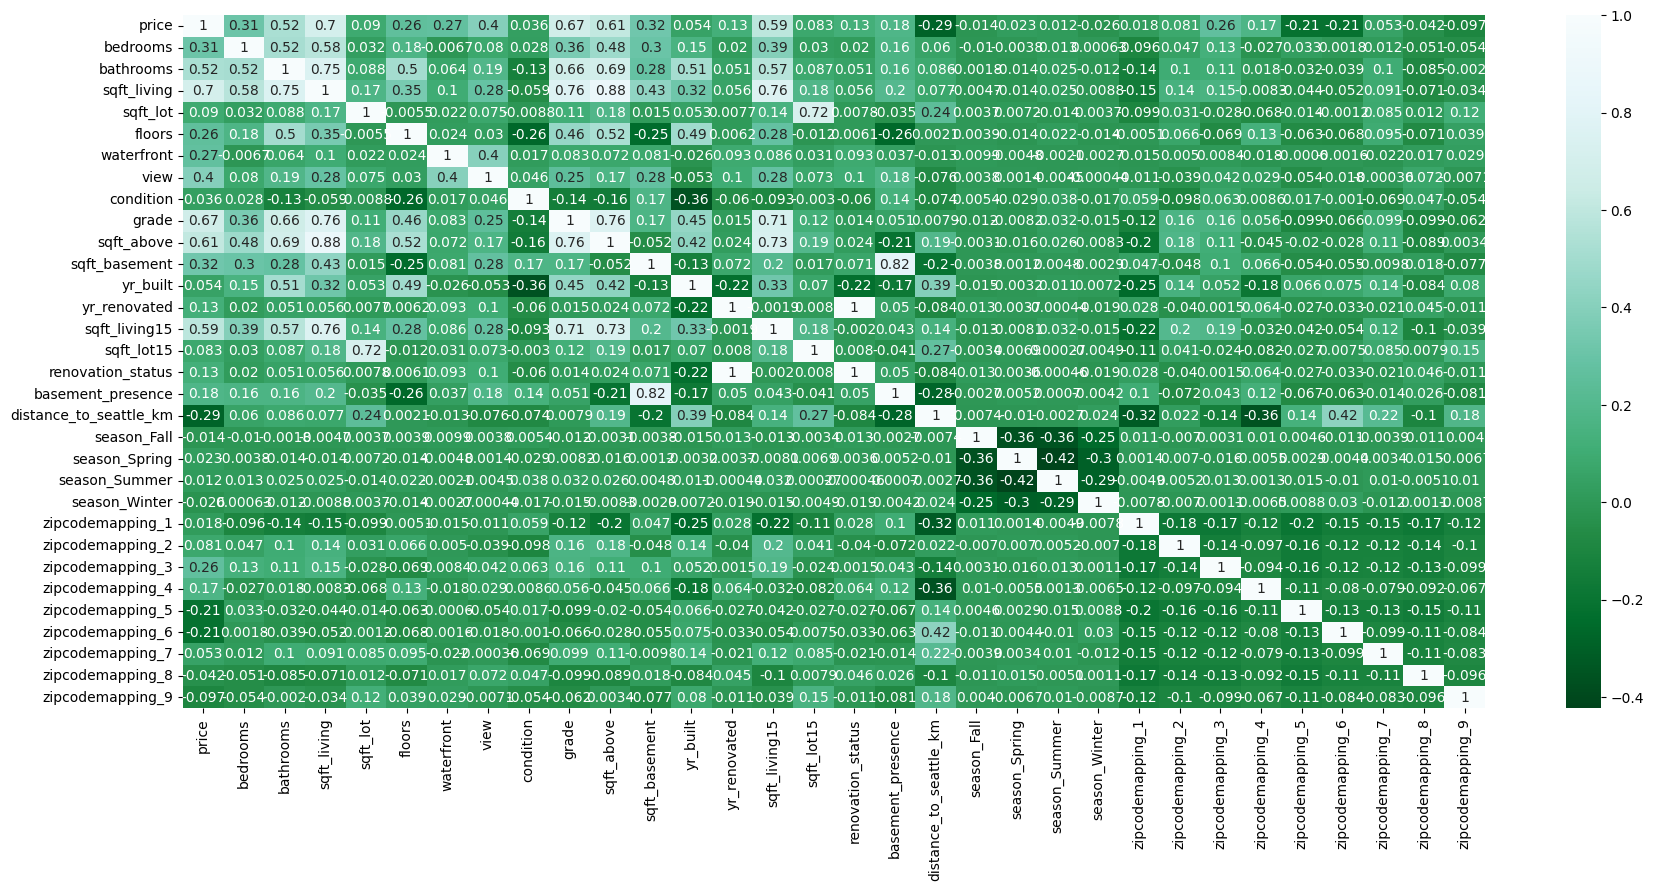

In [49]:
plt.figure(figsize=(21, 9)) 
sns.heatmap(df_final.corr(), annot=True, cmap='BuGn_r') 
plt.show()

In [50]:
# https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

# Create correlation matrix
corr_mat = df_final.corr(method='pearson')

# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()

sorted_mat[0:20]

season_Spring           season_Summer            -0.423018
season_Summer           season_Spring            -0.423018
season_Fall             season_Spring            -0.363413
season_Spring           season_Fall              -0.363413
condition               yr_built                 -0.361431
yr_built                condition                -0.361431
zipcodemapping_4        distance_to_seattle_km   -0.358658
distance_to_seattle_km  zipcodemapping_4         -0.358658
season_Summer           season_Fall              -0.355997
season_Fall             season_Summer            -0.355997
zipcodemapping_1        distance_to_seattle_km   -0.320064
distance_to_seattle_km  zipcodemapping_1         -0.320064
season_Winter           season_Spring            -0.298686
season_Spring           season_Winter            -0.298686
season_Summer           season_Winter            -0.292591
season_Winter           season_Summer            -0.292591
price                   distance_to_seattle_km   -0.2868

In [51]:
print(sorted_mat[-51:-31])

sqft_living15      grade                0.713128
sqft_lot           sqft_lot15           0.718396
sqft_lot15         sqft_lot             0.718396
sqft_above         sqft_living15        0.731951
sqft_living15      sqft_above           0.731951
sqft_living        bathrooms            0.754559
bathrooms          sqft_living          0.754559
sqft_above         grade                0.755956
grade              sqft_above           0.755956
sqft_living15      sqft_living          0.756386
sqft_living        sqft_living15        0.756386
grade              sqft_living          0.762676
sqft_living        grade                0.762676
sqft_basement      basement_presence    0.819082
basement_presence  sqft_basement        0.819082
sqft_above         sqft_living          0.876523
sqft_living        sqft_above           0.876523
renovation_status  yr_renovated         0.999968
yr_renovated       renovation_status    0.999968
price              price                1.000000
dtype: float64


In [52]:
df_final_clean = df_final.drop(['sqft_living15', 'sqft_living15', 'sqft_lot15', 'yr_renovated'], axis = 1) #use this for poly reg
# df_filtered - is the baseline model, it doesnt have feature variables created, just the variables that were originally present in the dataset

In [53]:
df_final_clean.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'renovation_status', 'basement_presence',
       'distance_to_seattle_km', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'zipcodemapping_1',
       'zipcodemapping_2', 'zipcodemapping_3', 'zipcodemapping_4',
       'zipcodemapping_5', 'zipcodemapping_6', 'zipcodemapping_7',
       'zipcodemapping_8', 'zipcodemapping_9'],
      dtype='object')

## First regression model - Data test split - Model fitting (Linear regression)

In [220]:
# df_filtered doesnt have all the features that were created - e.g. hse_years_total etc. (refer to the above print - df_filtered_trans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


X_baseline = df_filtered.drop(['price', 'id', 'date', 'lat', 'long'], axis = 1) #
y_baseline = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=42)

In [222]:
print("Total Number of rows:", len(df_filtered))
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Total Number of rows: 21592
X_train shape: (17273, 16)
X_test shape: (4319, 16)
y_train shape: (17273,)
y_test shape: (4319,)


## Baseline model - reg without features

In [225]:
# Linear Regression
regmodel = LinearRegression()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape) #For checking 

(17273, 16)
(4319, 16)


In [227]:
regmodel.fit(X_train_scaled,y_train)

LinearRegression()

In [229]:
y_pred = regmodel.predict(X_test_scaled)

In [231]:
# Compute R-squared
r_squared = regmodel.score(X_test_scaled, y_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.6553816468508951
RMSE: 212413.2890722984


In [178]:
coefficients = regmodel.coef_
intercept = regmodel.intercept_

In [180]:
coef_table = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": coefficients
})

sorted_base_df = coef_table.sort_values(by='Coefficient')

print("Intercept:", intercept)
print(sorted_base_df)

Intercept: 541112.2065072656
                   Feature  Coefficient
14  distance_to_seattle_km  -79760.6299
23        zipcodemapping_5  -40725.7230
11                yr_built  -32349.1769
0                 bedrooms  -30829.2255
24        zipcodemapping_6  -25115.2479
4                   floors  -23375.9910
13       basement_presence  -14999.5030
27        zipcodemapping_9   -9742.0721
26        zipcodemapping_8   -7823.6292
20        zipcodemapping_2   -4760.7907
15             season_Fall   -4697.6971
17           season_Summer   -2927.5382
18           season_Winter   -1876.1027
3                 sqft_lot    4849.2314
16           season_Spring    8826.5718
12       renovation_status   11520.8246
25        zipcodemapping_7   14078.1885
19        zipcodemapping_1   14737.8220
7                condition   22259.1336
10           sqft_basement   24372.6847
1                bathrooms   27054.2532
22        zipcodemapping_4   27770.6284
6                     view   35839.0082
21        z

In [64]:
df_filtered['grade'].value_counts()

grade
7     8974
8     6065
9     2612
6     2034
10    1134
11     399
5      238
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

## model - reg with features

In [233]:
X_linear = df_final_clean.drop(['price'], axis = 1)
y_linear = df_final_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

In [235]:
# Linear Regression
regmodelfeat = LinearRegression()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape) #For checking 



(17273, 28)
(4319, 28)


In [237]:
regmodelfeat.fit(X_train_scaled,y_train)

LinearRegression()

In [239]:
y_pred = regmodelfeat.predict(X_test_scaled)

In [241]:
# Compute R-squared
r_squared = regmodelfeat.score(X_test_scaled, y_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.7486453257404844
RMSE: 181407.80368651787


In [243]:
coefficients = regmodelfeat.coef_
intercept = regmodelfeat.intercept_

In [245]:
coef_table = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": coefficients
})

sorted_base_df = coef_table.sort_values(by='Coefficient')

print("Intercept:", intercept)
print(sorted_base_df)

Intercept: 541112.2065072656
                   Feature  Coefficient
14  distance_to_seattle_km  -79760.6299
23        zipcodemapping_5  -40725.7230
11                yr_built  -32349.1769
0                 bedrooms  -30829.2255
24        zipcodemapping_6  -25115.2479
4                   floors  -23375.9910
13       basement_presence  -14999.5030
27        zipcodemapping_9   -9742.0721
26        zipcodemapping_8   -7823.6292
20        zipcodemapping_2   -4760.7907
15             season_Fall   -4697.6971
17           season_Summer   -2927.5382
18           season_Winter   -1876.1027
3                 sqft_lot    4849.2314
16           season_Spring    8826.5718
12       renovation_status   11520.8246
25        zipcodemapping_7   14078.1885
19        zipcodemapping_1   14737.8220
7                condition   22259.1336
10           sqft_basement   24372.6847
1                bathrooms   27054.2532
22        zipcodemapping_4   27770.6284
6                     view   35839.0082
21        z

## Poly regression

In [253]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# https://www.youtube.com/watch?v=H8kocPOT5v0&ab_channel=NeuralNine

X_poly = df_final_clean.drop(['price'], axis = 1)
y_poly = df_final_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

In [255]:
X_poly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21592 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bedrooms                21592 non-null  int64  
 1   bathrooms               21592 non-null  float64
 2   sqft_living             21592 non-null  int64  
 3   sqft_lot                21592 non-null  int64  
 4   floors                  21592 non-null  float64
 5   waterfront              21592 non-null  int64  
 6   view                    21592 non-null  int64  
 7   condition               21592 non-null  int64  
 8   grade                   21592 non-null  int64  
 9   sqft_above              21592 non-null  int64  
 10  sqft_basement           21592 non-null  int64  
 11  yr_built                21592 non-null  int64  
 12  renovation_status       21592 non-null  int32  
 13  basement_presence       21592 non-null  int32  
 14  distance_to_seattle_km  21592 non-null  flo

In [257]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape) #For checking 

(17273, 28)
(4319, 28)


In [259]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train)

y_pred = poly_model.predict(X_test_scaled)

In [261]:
# Compute R-squared
r_squared = poly_model.score(X_test_scaled, y_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.860590166191858
RMSE: 135101.19395780595


In [263]:
# Step 2: Get the polynomial feature names
feature_names = poly_model.named_steps['polynomialfeatures'].get_feature_names_out(X_train.columns)

# Step 3: Get the coefficients from the linear regression step
coefficients = poly_model.named_steps['linearregression'].coef_
intercept = poly_model.named_steps['linearregression'].intercept_

# Step 4: Create a DataFrame (like SPSS coefficients table)
coef_table = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# Display
print("Intercept:", intercept)
pd.set_option('display.float_format', '{:.4f}'.format)
print(coef_table)

Intercept: 452809.5419814824
                               Feature  Coefficient
0                                    1       0.0000
1                             bedrooms   -4710.5900
2                            bathrooms   11575.8042
3                          sqft_living   63764.3861
4                             sqft_lot   95635.2656
..                                 ...          ...
430  zipcodemapping_7 zipcodemapping_8    -272.0025
431  zipcodemapping_7 zipcodemapping_9    -326.6839
432                 zipcodemapping_8^2   -4226.1120
433  zipcodemapping_8 zipcodemapping_9     789.0286
434                 zipcodemapping_9^2   -3098.5071

[435 rows x 2 columns]


In [265]:
sorted_df = coef_table.sort_values(by='Coefficient')

In [267]:
sorted_df.head(10)

,Feature,Coefficient
15,distance_to_seattle_km,-154917.6219
337,distance_to_seattle_km zipcodemapping_3,-143835.0217
335,distance_to_seattle_km zipcodemapping_1,-47414.1720
231,grade distance_to_seattle_km,-31308.6042
128,sqft_lot zipcodemapping_3,-28101.9931
127,sqft_lot zipcodemapping_2,-25373.5036
250,sqft_above distance_to_seattle_km,-21995.3371
133,sqft_lot zipcodemapping_8,-21275.1308
130,sqft_lot zipcodemapping_5,-20809.7266
96,sqft_living distance_to_seattle_km,-20277.1007


In [269]:
sorted_df.tail(10)

,Feature,Coefficient
126,sqft_lot zipcodemapping_1,27140.0842
330,distance_to_seattle_km^2,27264.2790
336,distance_to_seattle_km zipcodemapping_2,50493.8369
414,zipcodemapping_4^2,54445.4453
3,sqft_living,63764.3861
10,sqft_above,64252.6951
9,grade,71839.2889
4,sqft_lot,95635.2656
338,distance_to_seattle_km zipcodemapping_4,127376.6327
129,sqft_lot zipcodemapping_4,148096.9350


In [273]:
compare = pd.DataFrame({'Model': ["Baseline Linear Regression without features", "Linear Regression with features", 
                                  "Polynomial Regression with features"], 
                        'R2 Score': [0.6553, 0.7486, 0.8606],
                       'RMSE': [212413.289, 181407.804,  135101.194]})
compare.sort_values(by='R2 Score', ascending=False)

,Model,R2 Score,RMSE
2,Polynomial Regression with features,0.8606,135101.1900
1,Linear Regression with features,0.7486,181407.8040
0,Baseline Linear Regression without features,0.6553,212413.2890
